Charger et explorer le dataset 

In [2]:
import pandas as pd

df = pd.read_csv('RansomwaresGoodwaresDataset.csv')


Informations générales sur le dataset

In [9]:
# Afficher les informations générales du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 248 entries, Sample_Type to HKEY_LOCAL_MACHINE\SYSTEM\Setup\SystemSetupInProgress
dtypes: float64(2), int64(245), object(1)
memory usage: 2.0+ MB


In [10]:
#Un peu de statisrique Descriptive
df.describe()


,bind,CertControlStore,CertOpenStore,closesocket,CoCreateInstance,CoCreateInstanceEx,CoGetClassObject,CoInitializeEx,CoInitializeSecurity,connect,...,HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Policies\Explorer\,HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Internet Settings\,HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\Internet Settings\,HKEY_LOCAL_MACHINE\SOFTWARE\MICROSOFT\Cryptography\.1,HKEY_LOCAL_MACHINE\SYSTEM\ControlSet001\services\crypt32\,HKEY_LOCAL_MACHINE\SYSTEM\ControlSet001\services\Tcpip\Parameters\,HKEY_LOCAL_MACHINE\Software\Microsoft\Rpc\,HKEY_CURRENT_USER\Software\Microsoft\RestartManager,HKEY_LOCAL_MACHINE\SYSTEM\Setup\OOBEInProgress,HKEY_LOCAL_MACHINE\SYSTEM\Setup\SystemSetupInProgress
count,1041.000000,1042.000000,1041.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1.470701,0.461612,2.140250,1.617083,36.751440,0.318618,1.174664,39.429942,0.598848,0.276392,...,14.194818,30.893474,1.742802,25.303263,1.842610,13.381958,0.954894,23.871401,0.869482,1.656430
std,17.682927,3.809206,23.816759,17.914897,106.551682,2.796701,4.584589,92.010573,3.540125,2.454269,...,26.788413,142.181208,10.377647,228.152287,8.458192,100.509968,6.733637,413.996715,1.958810,3.535059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,255.000000,64.000000,616.000000,256.000000,1117.000000,73.000000,77.000000,725.000000,72.000000,61.000000,...,288.000000,1714.000000,97.000000,4774.000000,127.000000,2068.000000,94.000000,9412.000000,21.000000,47.000000


Visualisations


Nombre d'échantillons par type:
Sample_Type
G    524
R    518
Name: count, dtype: int64
Distribution des types d'échantillons (%):
Sample_Type
G    50.29
R    49.71
Name: proportion, dtype: float64


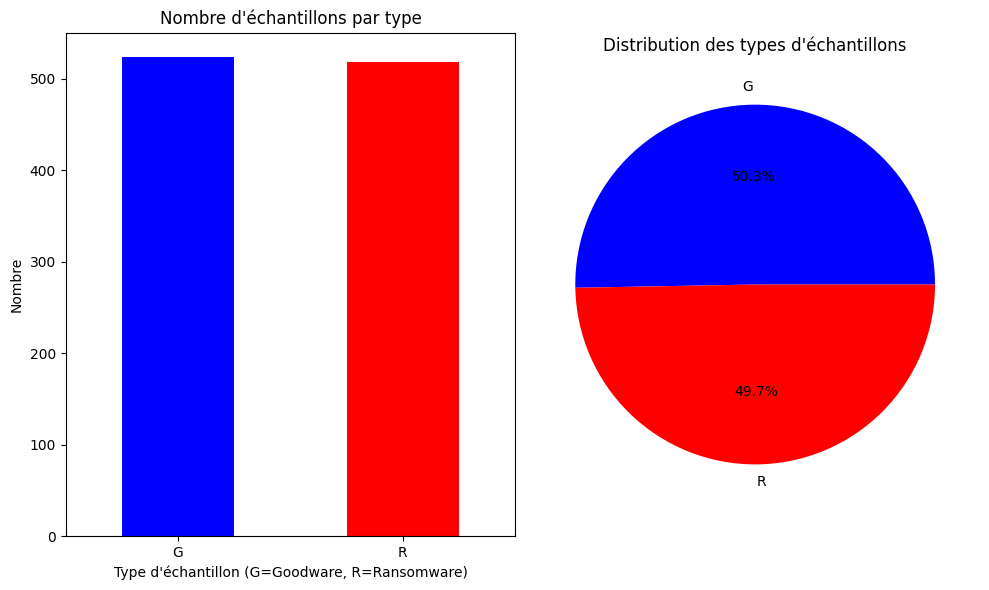

In [2]:
# Compter le nombre d'échantillons de chaque type
nombre_echantillons = df['Sample_Type'].value_counts()
print("Nombre d'échantillons par type:")
print(nombre_echantillons)

# Calculer la distribution en pourcentage
pourcentage_echantillons = df['Sample_Type'].value_counts(normalize=True) * 100
print("Distribution des types d'échantillons (%):")
print(pourcentage_echantillons.round(2))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graphique à barres
plt.subplot(1, 2, 1)
nombre_echantillons.plot(kind='bar', color=['blue', 'red'])
plt.title("Nombre d'échantillons par type")
plt.xlabel("Type d'échantillon (G=Goodware, R=Ransomware)")
plt.ylabel("Nombre")
plt.xticks(rotation=0)

# Graphique circulaire
plt.subplot(1, 2, 2)
nombre_echantillons.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Distribution des types d'échantillons")
plt.ylabel('')

plt.tight_layout()
plt.show()

# Identification des caractéristiques discriminantes entre Goodware et Ransomware

Dans cette cellule on identifie les caractéristiques comportementales qui différencient le plus les Goodwares des Ransomwares. Nous calculons les valeurs moyennes de chaque caractéristique pour les deux classes, détermine la différence absolue entre ces moyennes, puis on visualise les 20 caractéristiques présentant les plus grandes différences à l'aide d'un graphique à barres horizontales.

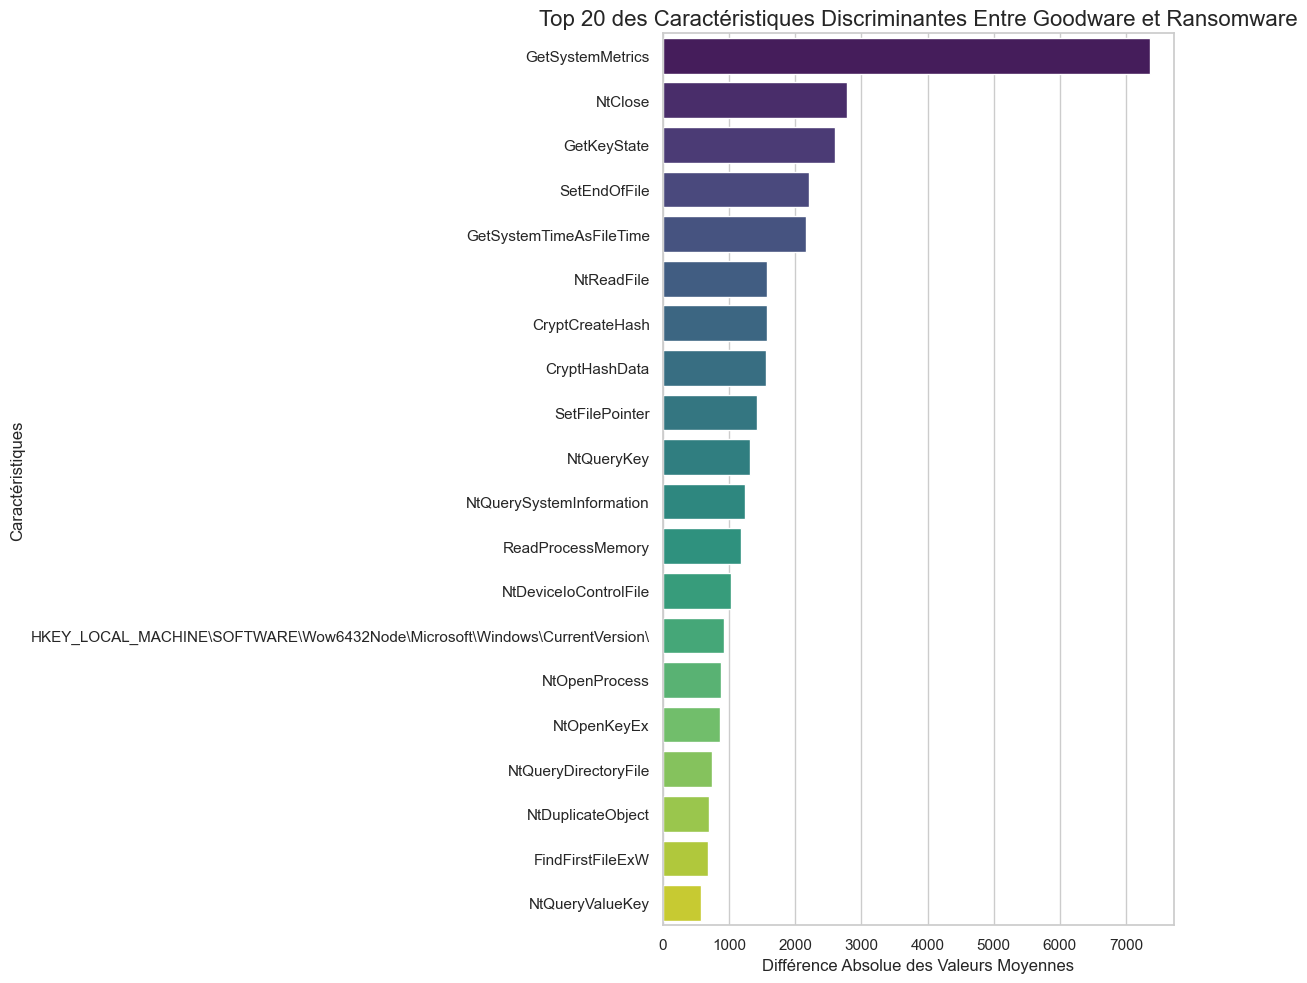

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculer les valeurs moyennes pour chaque classe
moyennes_goodware = df[df['Sample_Type'] == 'G'].mean(numeric_only=True)
moyennes_ransomware = df[df['Sample_Type'] == 'R'].mean(numeric_only=True)

# Calculer la différence absolue entre les moyennes
diff_abs = abs(moyennes_goodware - moyennes_ransomware)

# Trier et obtenir les 20 meilleures caractéristiques
top_20_caracteristiques = diff_abs.sort_values(ascending=False).head(20)

# Créer un DataFrame pour le graphique
df_graphique = pd.DataFrame({
    'Caracteristique': top_20_caracteristiques.index,
    'Difference_Moyenne_Absolue': top_20_caracteristiques.values
})

# Créer un graphique à barres horizontales
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

ax = sns.barplot(
    x='Difference_Moyenne_Absolue',
    y='Caracteristique',
    hue='Caracteristique',
    data=df_graphique,
    palette='viridis',
    legend=False
)

plt.title('Top 20 des Caractéristiques Discriminantes Entre Goodware et Ransomware', fontsize=16)
plt.xlabel('Différence Absolue des Valeurs Moyennes', fontsize=12)
plt.ylabel('Caractéristiques', fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Visualisation des distributions des caractéristiques les plus discriminantes

Cette cellule visualise les distributions des 6 caractéristiques présentant les plus grandes différences entre les Goodwares et les Ransomwares. 

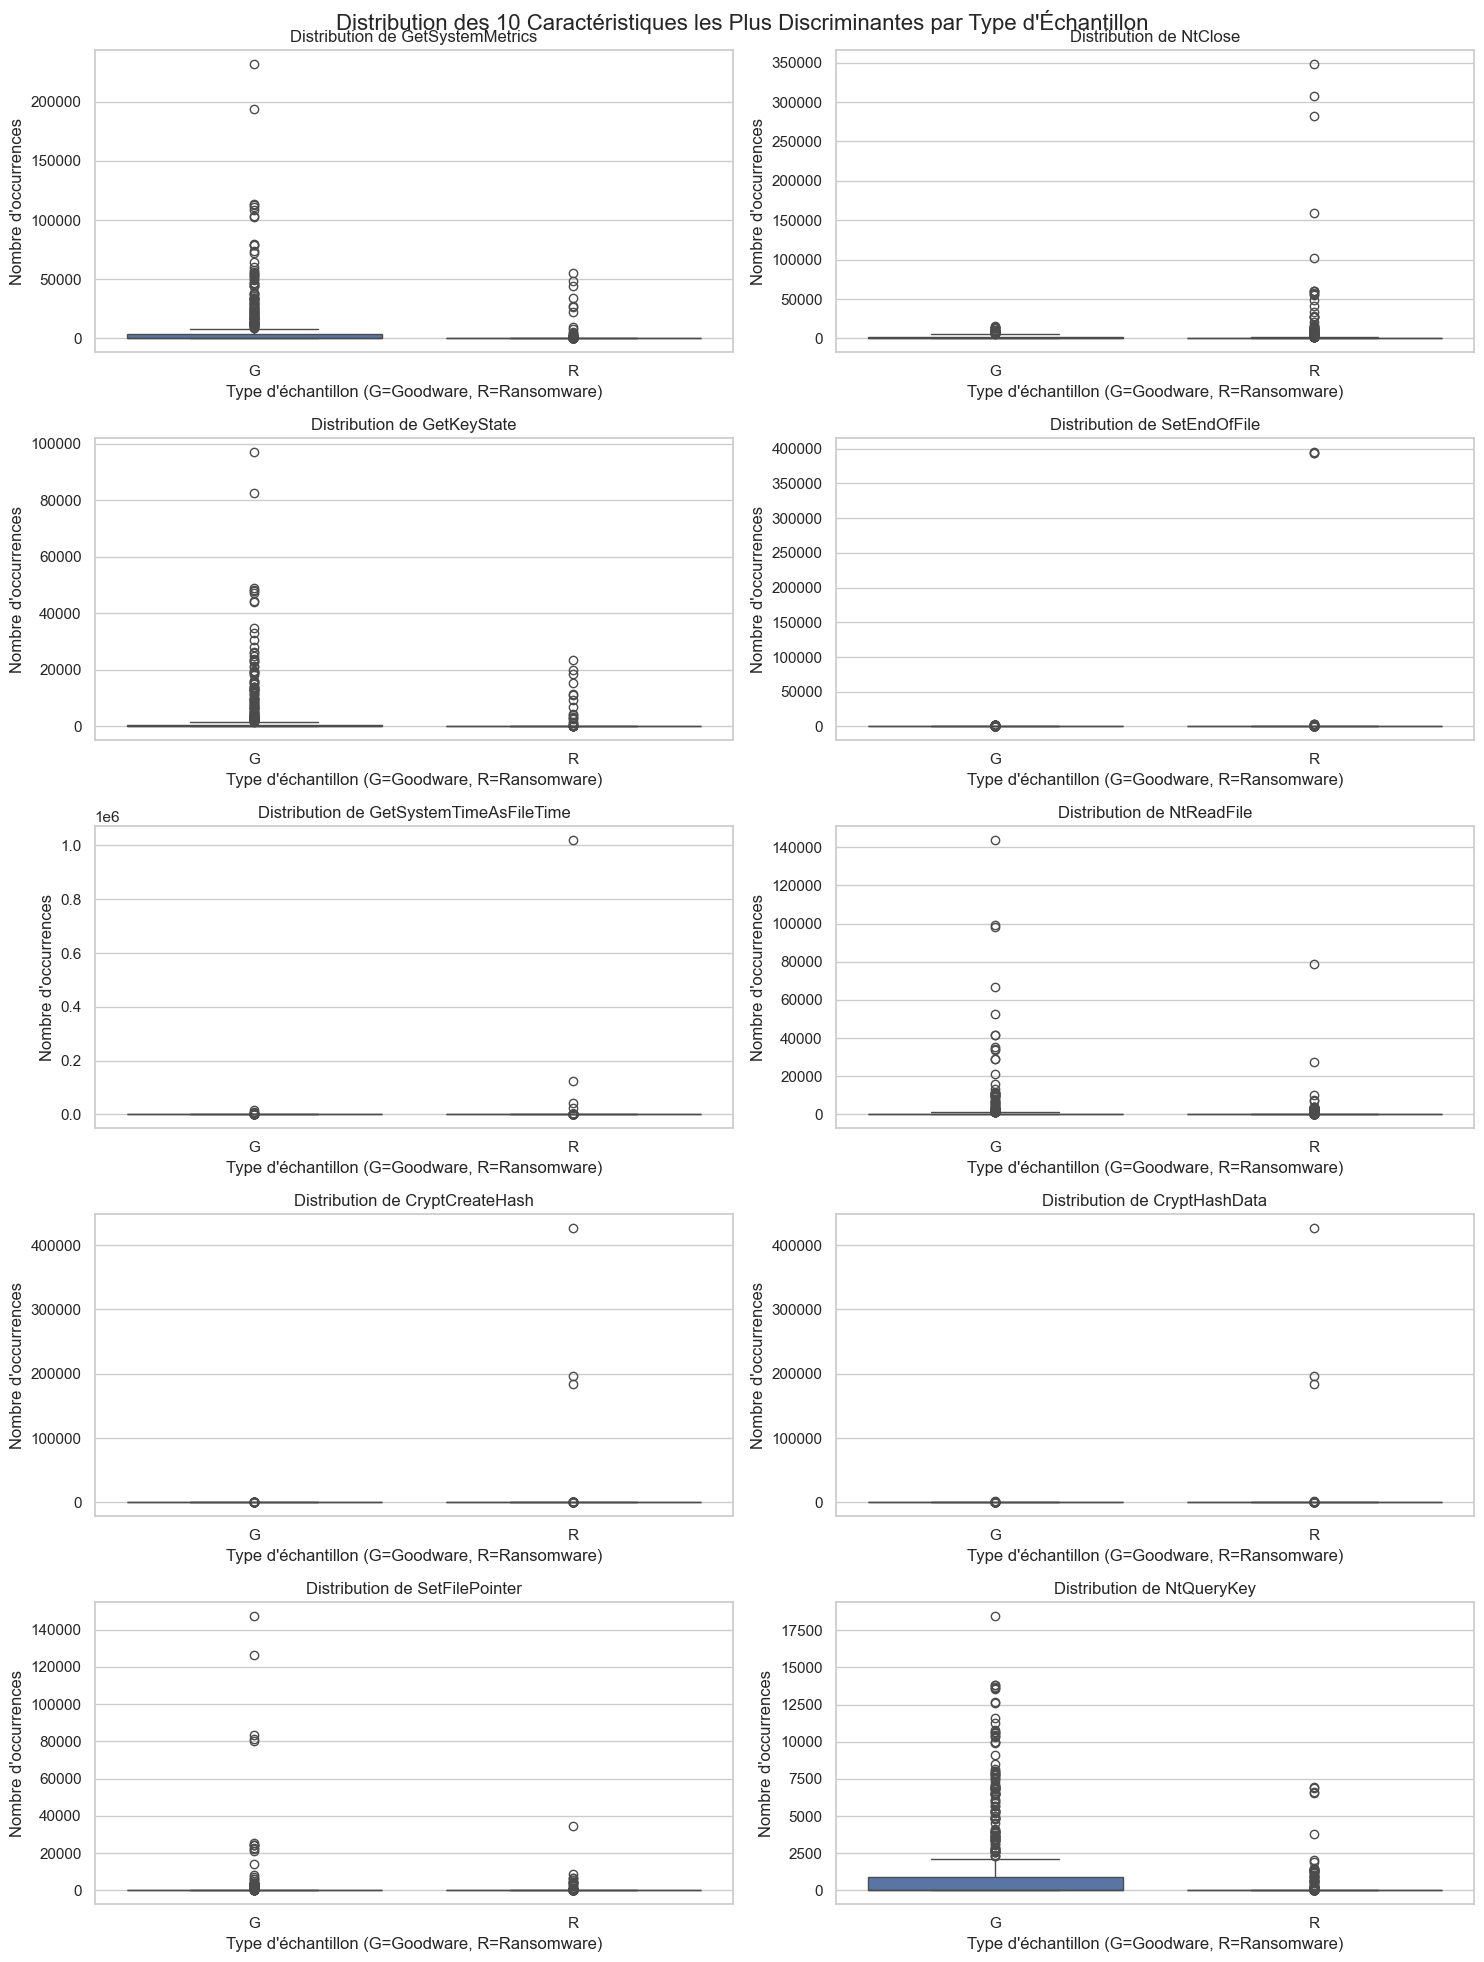

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Sélectionner les 10 premières caractéristiques les plus discriminantes
top_10_features = top_20_caracteristiques.head(10).index

# Créer une figure avec 5x2 subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Distribution des 10 Caractéristiques les Plus Discriminantes par Type d\'Échantillon', fontsize=16)

# Aplatir le tableau d'axes pour faciliter l'itération
axes = axes.ravel()

# Créer un boxplot pour chaque caractéristique
for idx, feature in enumerate(top_10_features):
    sns.boxplot(x='Sample_Type', y=feature, data=df, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {feature}')
    axes[idx].set_xlabel('Type d\'échantillon (G=Goodware, R=Ransomware)')
    axes[idx].set_ylabel('Nombre d\'occurrences')
    
    # Rotation des labels si nécessaire
    axes[idx].tick_params(axis='x', rotation=0)
    
# Ajuster l'espacement entre les subplots
plt.tight_layout()
plt.show()

# Analyse des corrélations entre caractéristiques comportementales

Cette section explore les relations entre les différentes caractéristiques comportementales des échantillons, permettant d'identifier les motifs d'activités qui se produisent ensemble ou s'excluent mutuellement. L'analyse des corrélations aide à comprendre les interactions entre les fonctions API et les accès au registre, révélant potentiellement des schémas comportementaux spécifiques aux logiciels malveillants.

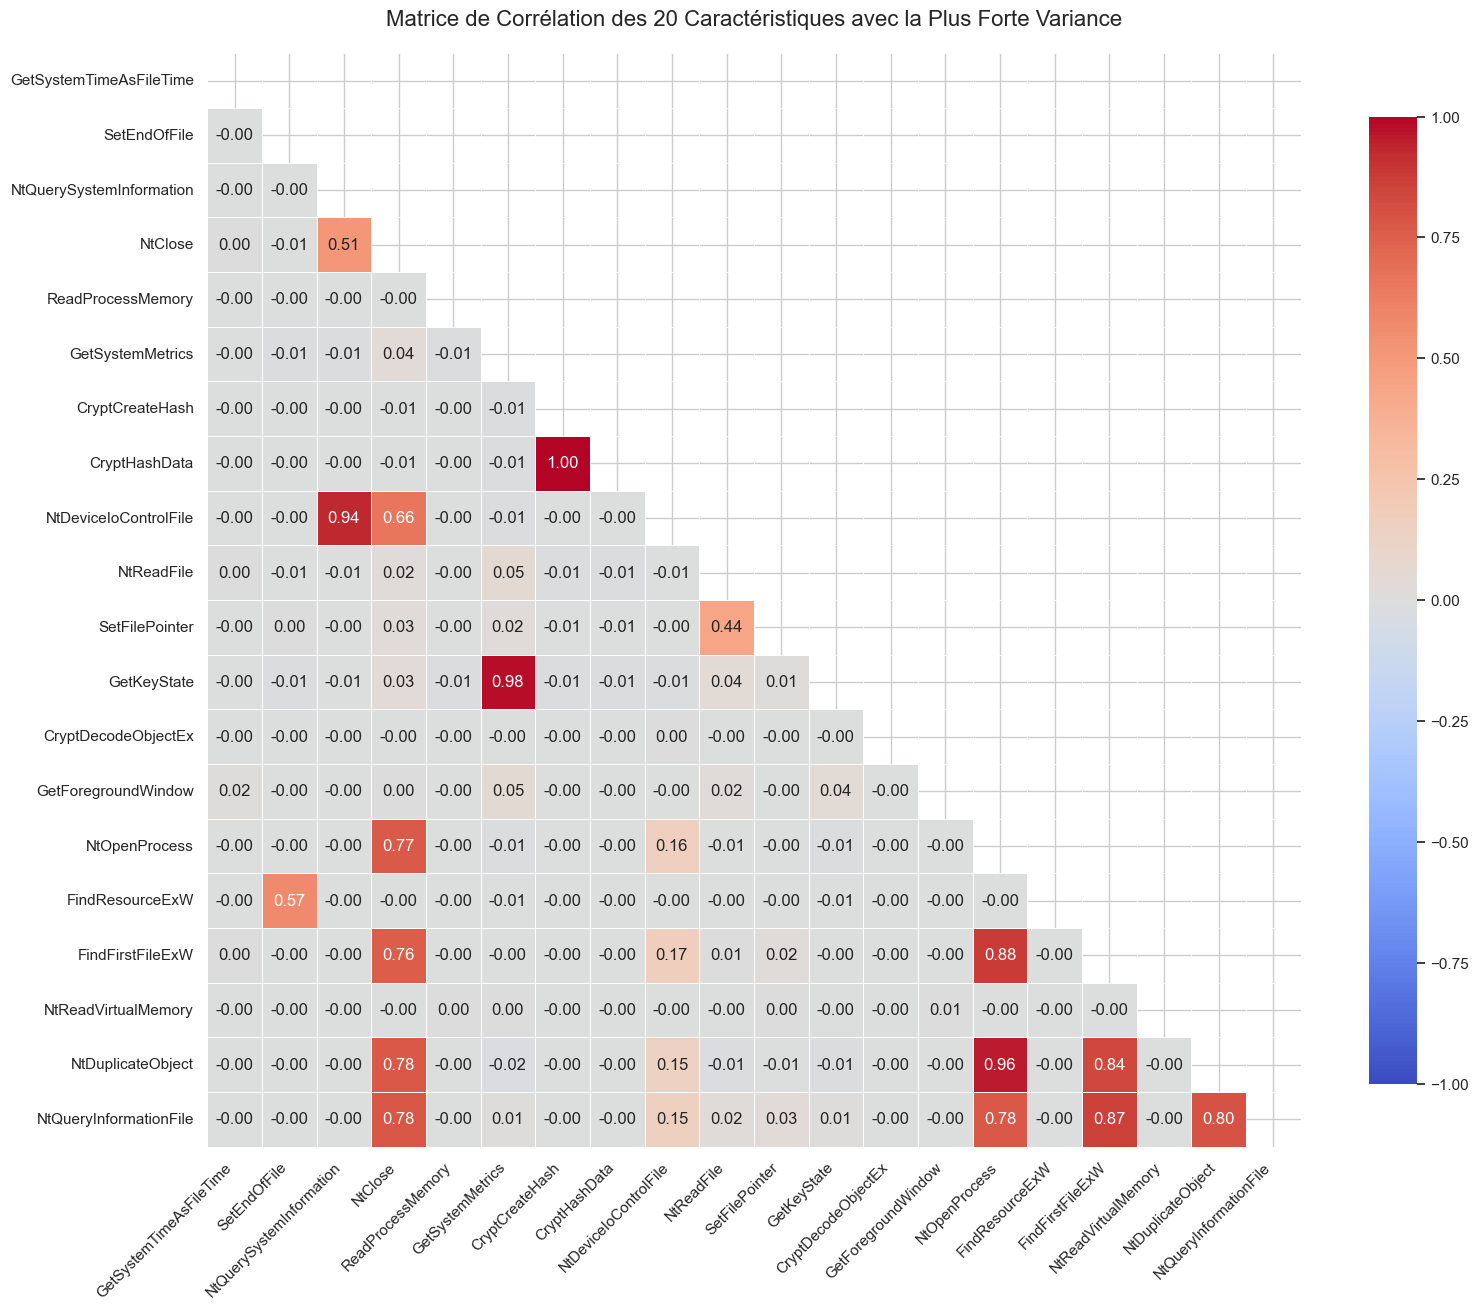

Top 20 Caractéristiques par Variance:
             Caracteristique      Variance
0    GetSystemTimeAsFileTime  1.014388e+09
1               SetEndOfFile  4.457972e+08
2   NtQuerySystemInformation  3.638606e+08
3                    NtClose  3.459972e+08
4          ReadProcessMemory  3.362434e+08
5           GetSystemMetrics  2.574825e+08
6            CryptCreateHash  2.438067e+08
7              CryptHashData  2.438036e+08
8      NtDeviceIoControlFile  1.038241e+08
9                 NtReadFile  6.217742e+07
10            SetFilePointer  6.042413e+07
11               GetKeyState  4.364506e+07
12       CryptDecodeObjectEx  3.546399e+07
13       GetForegroundWindow  3.475675e+07
14             NtOpenProcess  3.363725e+07
15           FindResourceExW  3.340744e+07
16          FindFirstFileExW  2.427147e+07
17       NtReadVirtualMemory  2.338266e+07
18         NtDuplicateObject  1.824387e+07
19    NtQueryInformationFile  1.812010e+07


In [6]:
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
import pandas as pd
#  Calculer la variance pour chaque caractéristique
variance_caracteristiques = df.drop('Sample_Type', axis=1).var()

# Obtenir les 20 caractéristiques avec la plus forte variance
top_20_caracteristiques_variance = variance_caracteristiques.sort_values(ascending=False).head(20).index.tolist()

# Calculer la matrice de corrélation pour ces caractéristiques
matrice_correlation = df[top_20_caracteristiques_variance].corr()

# Créer une figure de taille appropriée
plt.figure(figsize=(16, 14))

# Configurer la heatmap
masque = np.triu(matrice_correlation)
sns.heatmap(
    matrice_correlation, 
    annot=True,               
    fmt=".2f",
    cmap="coolwarm",
    mask=masque, 
    square=True,
    linewidths=0.5,           
    cbar_kws={"shrink": 0.8}, 
    vmin=-1, vmax=1           
)

# Ajouter un titre et ajuster la mise en page
plt.title('Matrice de Corrélation des 20 Caractéristiques avec la Plus Forte Variance', fontsize=16, pad=20)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Afficher le graphique
plt.show()

# Afficher également les valeurs de variance pour référence
df_variance = pd.DataFrame({
    'Caracteristique': top_20_caracteristiques_variance,
    'Variance': variance_caracteristiques[top_20_caracteristiques_variance].values
})
print("Top 20 Caractéristiques par Variance:")
print(df_variance)

# Identification des caractéristiques fortement corrélées

Cette analyse identifie les paires de caractéristiques comportementales ayant une très forte corrélation (>0.975). Cette détection permet de réduire la redondance dans les données en identifiant les fonctions API et accès registre qui varient systématiquement ensemble, révélant des motifs d'activité logicielle étroitement liés et des comportements potentiellement redondants pour la classification.

In [ ]:
matrice_corr = df.drop('Sample_Type', axis=1).corr().abs()

# Créer un DataFrame pour stocker les paires de corrélation
paires_corr = []

# Extraire les paires de caractéristiques avec une corrélation > 0.975 (en excluant les auto-corrélations)
for i in range(len(matrice_corr.columns)):
    for j in range(i):
        if matrice_corr.iloc[i, j] > 0.975:  # Vous pouvez ajuster ce seuil
            caracteristique1 = matrice_corr.columns[i]
            caracteristique2 = matrice_corr.columns[j]
            correlation = matrice_corr.iloc[i, j]
            paires_corr.append({
                'Caracteristique1': caracteristique1,
                'Caracteristique2': caracteristique2,
                'Correlation': correlation
            })

df_corr = pd.DataFrame(paires_corr)

df_corr.head(10)

,Caracteristique1,Caracteristique2,Correlation
0,closesocket,bind,0.989993
1,CoUninitialize,CoInitializeEx,0.998697
2,CryptHashData,CryptCreateHash,0.999982
3,GetFileType,FindFirstFileExW,0.976901
4,GetFileVersionInfoSizeExW,GetFileVersionInfoExW,1.000000
5,GetSystemMetrics,GetKeyState,0.983230
6,GetSystemWindowsDirectoryA,GetSystemDirectoryA,0.993391
7,GetUserNameW,DeviceIoControl,0.994606
8,GetVolumePathNameW,GetVolumeNameForVolumeMountPointW,0.999069
9,InternetConnectA,HttpOpenRequestA,0.981156


# Analyse en Composantes Principales (ACP) des échantillons Goodware et Ransomware

Cette visualisation utilise l'ACP pour réduire la dimensionnalité des données et projeter les échantillons dans un espace à deux dimensions, permettant d'observer les regroupements naturels entre logiciels légitimes et rançongiciels. La projection ACP facilite l'identification des tendances cachées dans le jeu de données multidimensionnel et aide à visualiser la séparation entre les deux catégories de logiciels.

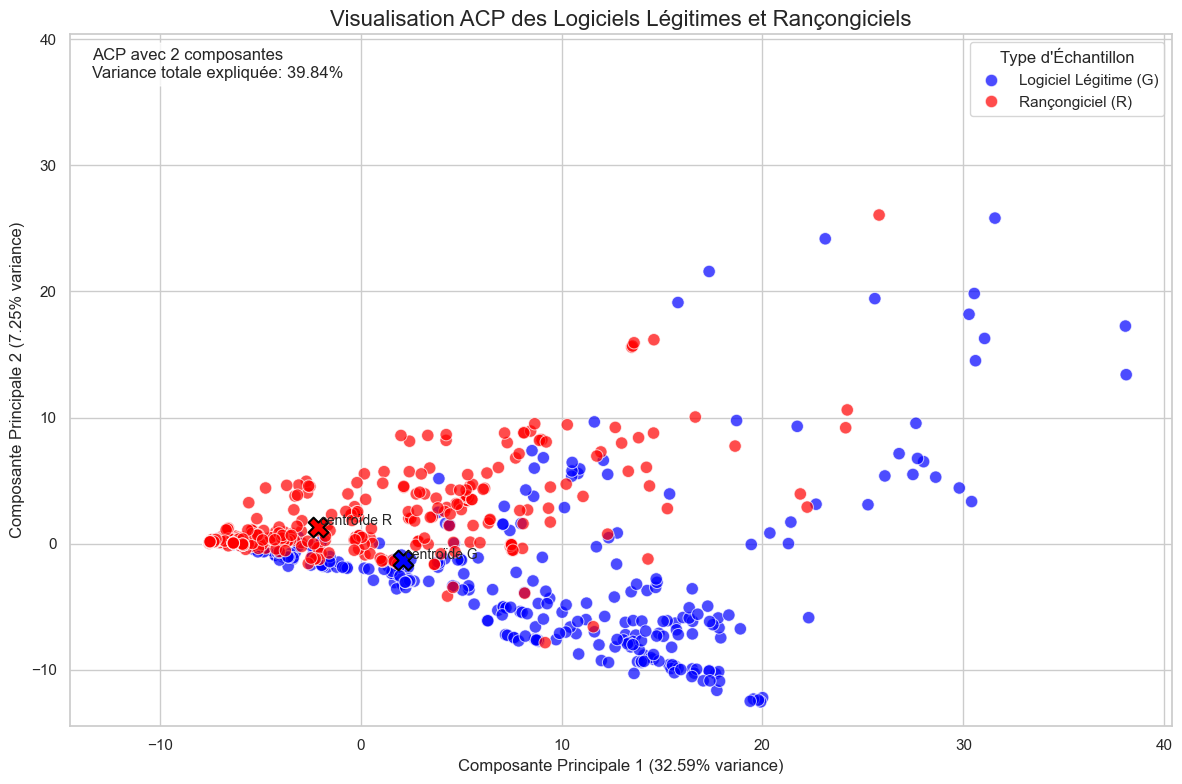

Top 5 caractéristiques pour CP1:
  CoInitializeEx: 0.1026
  CoUninitialize: 0.1008
  CoCreateInstance: 0.1002
  RegCloseKey: 0.0996
  NtMapViewOfSection: 0.0989

Top 5 caractéristiques pour CP2:
  HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Internet Settings\: 0.1434
  getaddrinfo: 0.1358
  InternetCloseHandle: 0.1354
  NtDeviceIoControlFile: 0.1309
  GetAdaptersAddresses: 0.1293



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# D'abord, séparons les caractéristiques de la cible
X = df.drop(['Sample_Type'], axis=1)
y = df['Sample_Type']

# Supprimons les colonnes non-caractéristiques créées dans les cellules précédentes
colonnes_a_supprimer = [col for col in X.columns if col.endswith('_log') or 
                   col in ['Total_Appels_API', 'Total_Acces_Registre', 
                           'Total_Appels_API_Log', 'Total_Acces_Registre_Log']]
X = X.drop(colonnes_a_supprimer, axis=1)

# Appliquer la transformation log(x+1) pour gérer la sparsité
X_log = np.log1p(X)

# Standardiser les caractéristiques (z-scores)
normalisateur = StandardScaler()
X_normalise = normalisateur.fit_transform(X_log)

# Appliquer l'ACP
acp = PCA(n_components=2)
X_acp = acp.fit_transform(X_normalise)

# Créer un DataFrame pour faciliter la visualisation
df_acp = pd.DataFrame({
    'CP1': X_acp[:, 0],
    'CP2': X_acp[:, 1],
    'Type_Echantillon': y
})

# Configurer le graphique
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Définir le mapping des couleurs
palette = {'G': 'blue', 'R': 'red'}

# Créer le nuage de points
nuage_points = sns.scatterplot(
    x='CP1', 
    y='CP2',
    data=df_acp,
    hue='Type_Echantillon',
    palette=palette,
    alpha=0.7,
    s=80  # Taille des points
)

# Ajouter les étiquettes et le titre
plt.title('Visualisation ACP des Logiciels Légitimes et Rançongiciels', fontsize=16)
plt.xlabel(f'Composante Principale 1 ({acp.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'Composante Principale 2 ({acp.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)

# Améliorer la légende - version corrigée qui préserve les couleurs
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Logiciel Légitime (G)', 'Rançongiciel (R)'], title='Type d\'Échantillon')

# Ajouter une ligne diagonale pour aider à visualiser la séparation
xlim = plt.xlim()
ylim = plt.ylim()

# Trouver les min et max globaux pour les deux axes
min_val = min(xlim[0], ylim[0])
max_val = max(xlim[1], ylim[1])

# Rendre le graphique plus symétrique pour une meilleure visualisation
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Ajouter des informations supplémentaires
texte_info = (
    f"ACP avec 2 composantes\n"
    f"Variance totale expliquée: {sum(acp.explained_variance_ratio_):.2%}"
)
plt.text(
    0.02, 0.98, texte_info,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Dessiner les centroïdes pour chaque classe
for type_echantillon, couleur in zip(['G', 'R'], ['blue', 'red']):
    sous_ensemble = df_acp[df_acp['Type_Echantillon'] == type_echantillon]
    centroide_x = sous_ensemble['CP1'].mean()
    centroide_y = sous_ensemble['CP2'].mean()
    plt.scatter(centroide_x, centroide_y, s=200, color=couleur, marker='X', edgecolor='black', linewidth=1.5)
    plt.text(centroide_x+0.1, centroide_y+0.1, f'centroïde {type_echantillon}', fontsize=10)

plt.tight_layout()
plt.show()

# Afficher les caractéristiques principales contribuant à CP1 et CP2
def afficher_principales_composantes_acp(acp, noms_caracteristiques, n_composantes=2, n_meilleures_caracteristiques=5):
    """Afficher les principales caractéristiques contribuant à chaque composante ACP"""
    for i in range(n_composantes):
        print(f"Top {n_meilleures_caracteristiques} caractéristiques pour CP{i+1}:")
        # Obtenir les valeurs absolues des poids des composantes
        composante = np.abs(acp.components_[i])
        # Obtenir les indices des caractéristiques principales
        indices_importants = composante.argsort()[-n_meilleures_caracteristiques:][::-1]
        for idx in indices_importants:
            print(f"  {noms_caracteristiques[idx]}: {acp.components_[i, idx]:.4f}")
        print()

# Afficher les caractéristiques principales
afficher_principales_composantes_acp(acp, X.columns, n_composantes=2, n_meilleures_caracteristiques=5)
